In [2]:
from __future__ import print_function, division
from builtins import range, input

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


from glob import glob

2022-07-29 12:04:32.177507: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-29 12:04:32.177596: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
TRAINING_DIR      = '/home/nolan/Documents/intel/Training'
TESTING_DIR       = '/home/nolan/Documents/intel/Test'
IMAGE_SIZE = [100, 100]
epochs = 10
batch_size = 32

In [4]:
image_files = glob(TRAINING_DIR + '/*/*.jp*g')
valid_image_files = glob(TESTING_DIR + '/*/*.jp*g')
folders = glob(TRAINING_DIR + '/*')

In [5]:
vgg = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(100, 100, 3))

2022-07-29 12:04:40.443221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-29 12:04:40.443249: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-29 12:04:40.443274: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nolan): /proc/driver/nvidia/version does not exist
2022-07-29 12:04:40.443882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(131, activation='softmax')(x)

In [7]:
model = Sequential()
model.add(vgg) # Ajout du modèle VGG16
model.add(Flatten()) 
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(131, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

2022-07-29 12:04:46.888499: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 75497472 exceeds 10% of free system memory.
2022-07-29 12:04:46.918057: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 75497472 exceeds 10% of free system memory.
2022-07-29 12:04:46.934041: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 75497472 exceeds 10% of free system memory.
2022-07-29 12:04:46.963935: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2022-07-29 12:04:46.991271: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.


In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [9]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*np.random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=add_noise,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [10]:
# create generators
train_generator = train_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = val_datagen.flow_from_directory(
  TESTING_DIR,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


/tmp/ipykernel_8048/2140459382.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
30/30 [==============================] - 136s 5s/step - loss: 6.5527 - accuracy: 0.0818 - val_loss: 4.2654 - val_accuracy: 0.1505
Epoch 2/10
30/30 [==============================] - 140s 5s/step - loss: 3.4728 - accuracy: 0.2599 - val_loss: 3.3585 - val_accuracy: 0.2870
Epoch 3/10
30/30 [==============================] - 141s 5s/step - loss: 2.3814 - accuracy: 0.4458 - val_loss: 2.4727 - val_accuracy: 0.4609
Epoch 4/10
30/30 [==============================] - 141s 5s/step - loss: 1.7084 - accuracy: 0.5656 - val_loss: 1.8460 - val_accuracy: 0.5677
Epoch 5/10
30/30 [==============================] - 143s 5s/step - loss: 1.3261 - accuracy: 0.6552 - val_loss: 1.4383 - val_accuracy: 0.6495
Epoch 6/10
30/30 [==============================] - 140s 5s/step - loss: 1.0172 - accuracy: 0.7214 - val_loss: 1.6333 - val_accuracy: 0.6318
Epoch 7/10
30/30 [==============================] - 140s 5s/step - loss: 0.9414 - accuracy: 0.7406 - val_loss: 1.2264 - val_accuracy: 0.6927
Epoch 8/10
30

In [14]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=20,
  steps_per_epoch=30,
  validation_steps=30,
)

/tmp/ipykernel_53293/1803019420.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
30/30 [==============================] - 73s 2s/step - loss: 1.6041 - accuracy: 0.5323 - val_loss: 1.3930 - val_accuracy: 0.6250
Epoch 2/20
30/30 [==============================] - 79s 3s/step - loss: 1.5464 - accuracy: 0.5396 - val_loss: 1.4498 - val_accuracy: 0.6094
Epoch 3/20
30/30 [==============================] - 89s 3s/step - loss: 1.6263 - accuracy: 0.5198 - val_loss: 2.1090 - val_accuracy: 0.4729
Epoch 4/20
30/30 [==============================] - 85s 3s/step - loss: 1.5650 - accuracy: 0.5427 - val_loss: 1.7282 - val_accuracy: 0.5750
Epoch 5/20
30/30 [==============================] - 85s 3s/step - loss: 1.4791 - accuracy: 0.5792 - val_loss: 1.6991 - val_accuracy: 0.5958
Epoch 6/20
30/30 [==============================] - 79s 3s/step - loss: 1.5234 - accuracy: 0.5594 - val_loss: 1.6334 - val_accuracy: 0.5646
Epoch 7/20
30/30 [==============================] - 81s 3s/step - loss: 1.4319 - accuracy: 0.5792 - val_loss: 1.4731 - val_accuracy: 0.5875
Epoch 8/20
30/30 [==

In [15]:
def diagnostic_learning_curves(history = r):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

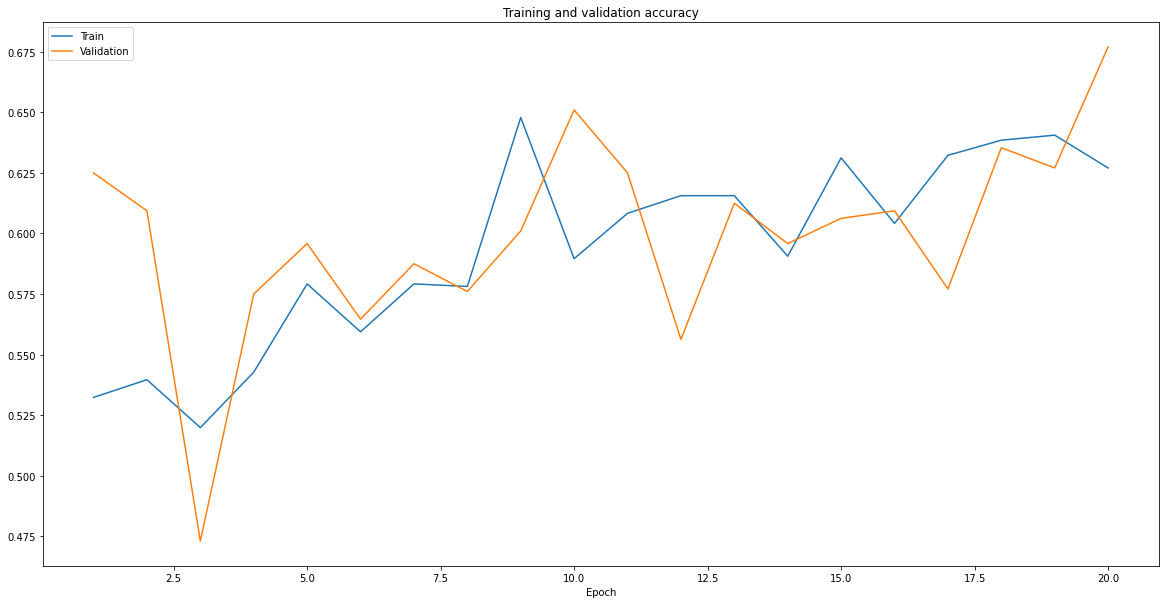

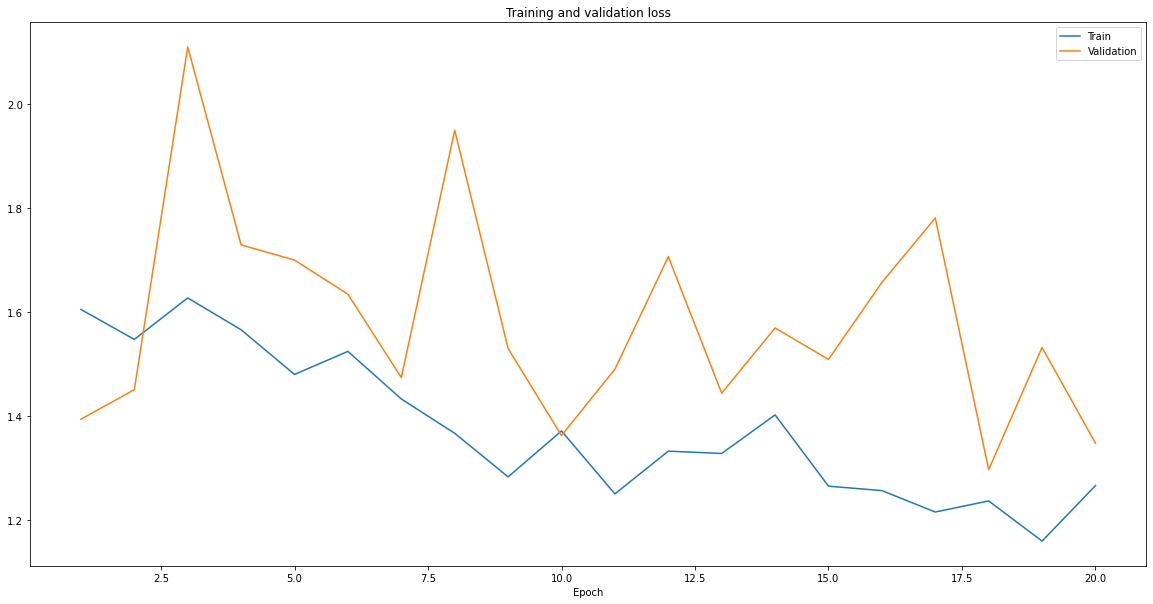

In [16]:
diagnostic_learning_curves()

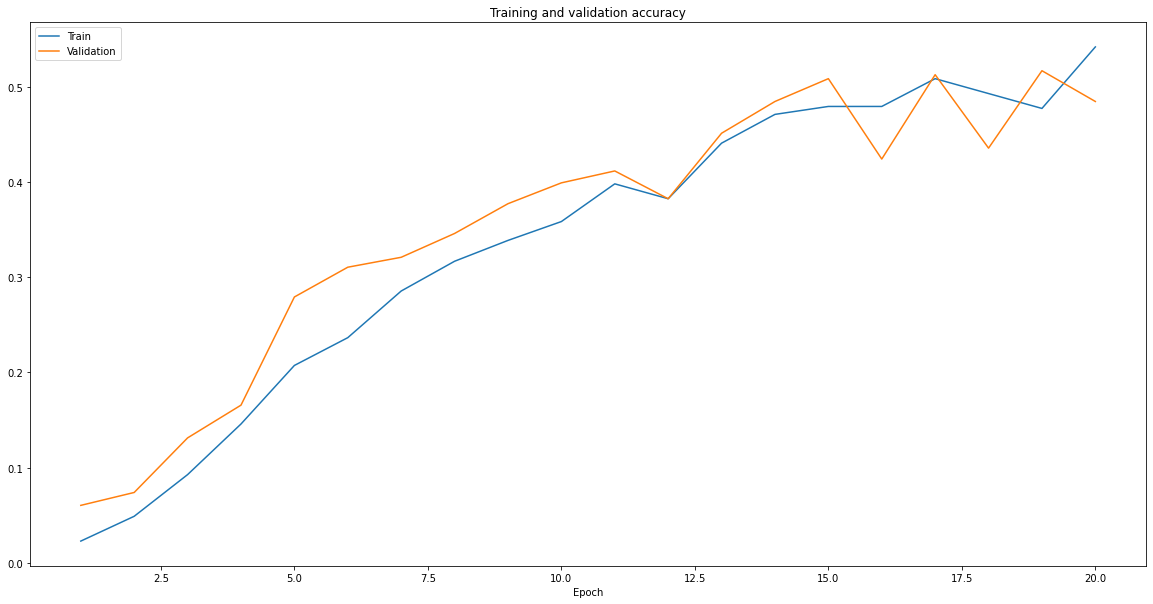

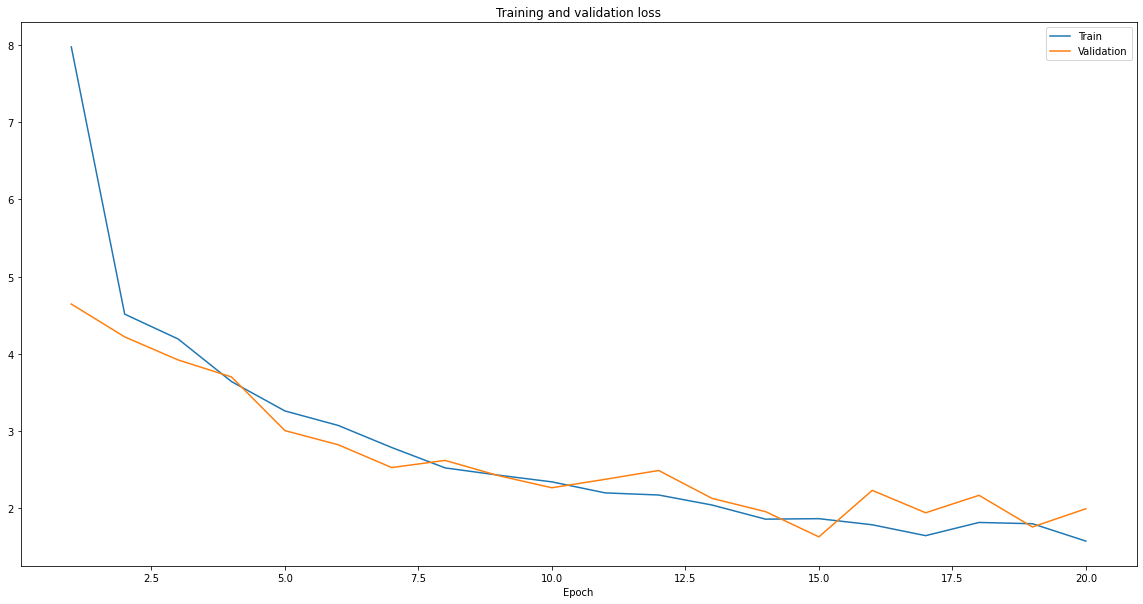

In [13]:
diagnostic_learning_curves()

In [69]:
def diagnostic_learning_curves(history = r):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

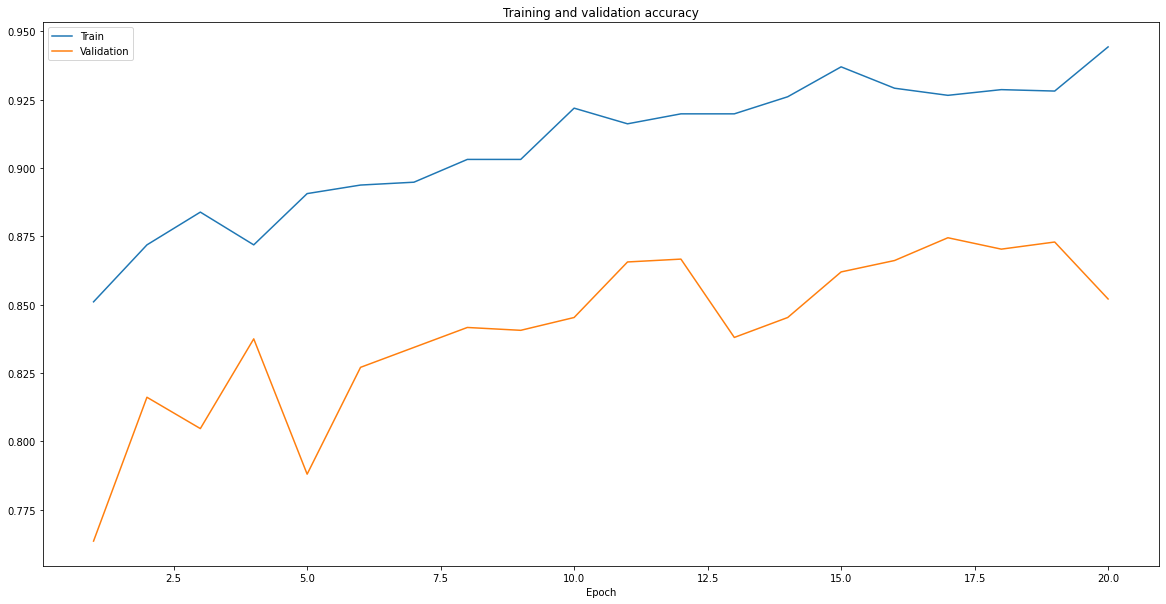

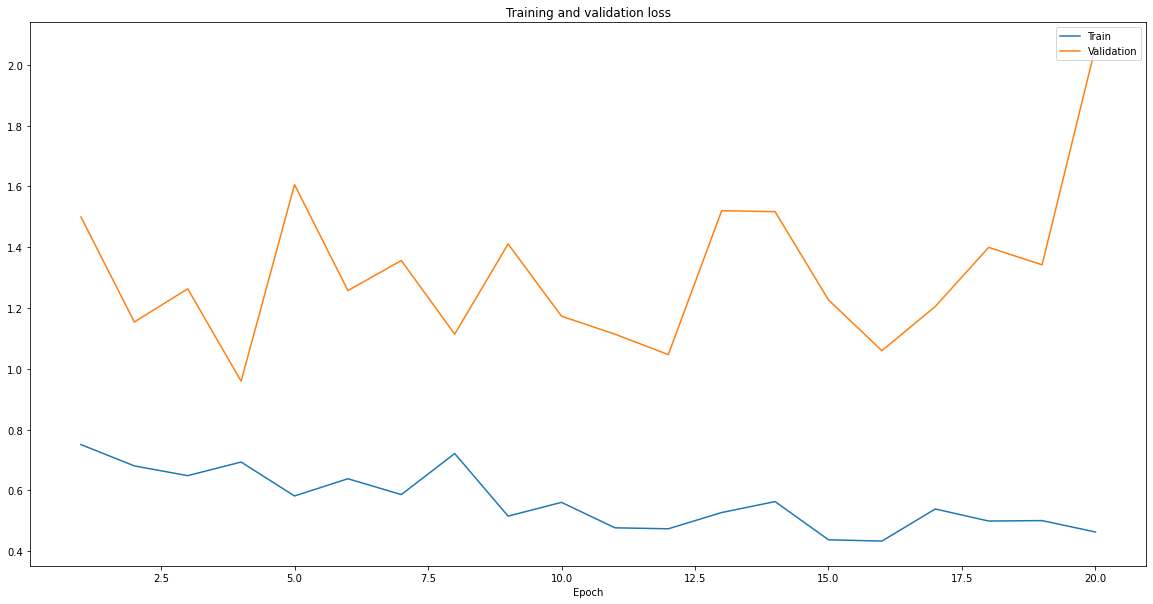

In [61]:
diagnostic_learning_curves()